<a href="https://colab.research.google.com/github/charlesyapai/movie_analysis/blob/master/EDA%20and%20Model%20Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Industry Insights

## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading and Cleaning](#data-loading-and-cleaning)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Predictive Modeling](#predictive-modeling)
5. [Recommendation System](#recommendation-system)
6. [Conclusion](#conclusion)

## Introduction
In this project, we aim to generate meaningful insights about the movie industry using the IMDb dataset. Our goal is to understand the factors that contribute to the success of a movie and to build a tool that can recommend actors, directors, and other factors based on user input. We will also attempt to predict certain success metrics such as gross revenue and user reviews.

## Data Loading and Cleaning
In this section, we will load our IMDb dataset and perform initial data cleaning steps. This includes handling missing values, dealing with outliers, and ensuring that our data is in the correct format for analysis. We will also take a preliminary look at our data to understand its structure and the types of variables we have.

## Exploratory Data Analysis
Here, we will dive deeper into our data. We will create visualizations to understand the distribution of key variables and identify any interesting patterns or outliers. We will also compute descriptive statistics to summarize our data and perform correlation analysis to identify relationships between different variables. This will give us a better understanding of our data and guide our subsequent modeling efforts.

## Predictive Modeling
In this section, we will build a machine learning model to predict success metrics based on other features in our data. We will split our data into training and test sets, select an appropriate model, train it on our data, and evaluate its performance. Our goal is to create a model that can accurately predict outcomes for new, unseen data.

## Recommendation System
Here, we will design and implement a recommendation system. Based on user input, our system will recommend actors, directors, and other factors that are likely to contribute to a successful movie. We will explore different recommendation approaches and select the one that provides the most relevant and useful recommendations.

## Conclusion
Finally, we will summarize our findings and discuss their implications. We will reflect on the insights we have gained about the movie industry, the performance of our predictive model, and the effectiveness of our recommendation system. We will also discuss any limitations of our work and potential directions for future research.

---
# Introduction and Significance of the Study

Intert Significance here


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

# Data Loading and Cleaning



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Converting the format into 0 decimal places
pd.options.display.float_format = '{:.0f}'.format

In [4]:
# Importing file from
df_import = pd.read_csv("/content/drive/MyDrive/IMDB Project/non_review_analysis/data/without_reviews_by_budget.csv")

<ipython-input-4-ca87ccf5d51c>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_import = pd.read_csv("/content/drive/MyDrive/IMDB Project/non_review_analysis/data/without_reviews_by_budget.csv")


In [5]:
#Copying the import for cleaning and editing
df = df_import.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69419 entries, 0 to 69418
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   imdb_id                       69419 non-null  object 
 1   title                         69419 non-null  object 
 2   runtime                       69419 non-null  int64  
 3   sound_mix                     69419 non-null  object 
 4   aspect_ratio                  69419 non-null  object 
 5   budget($)                     23548 non-null  float64
 6   budget_type                   69419 non-null  object 
 7   budget                        27933 non-null  object 
 8   gross_us_canada               12709 non-null  object 
 9   opening_weekend_us_canada     69419 non-null  object 
 10  opening_weekend_revenue(USD)  11750 non-null  float64
 11  opening_weekend_date          11750 non-null  object 
 12  gross_worldwide_usd           19028 non-null  object 
 13  w

In [7]:
#Genres are saved in a different dataframe
df3 = pd.read_csv('/content/drive/MyDrive/IMDB Project/Scraping/scraped_data/ScraPy_Code_1_data/all_movie_ids_final.csv')

# Extract the imdb_id from the details_url column in df3
df3['imdb_id'] = df3['details_url'].apply(lambda x: re.search('tt\d+', x).group(0))

df = pd.merge(df, df3[['imdb_id', 'Genres']], on='imdb_id', how='left')

In [8]:
def remove_newline(df, column_name):
    df[column_name] = df[column_name].str.replace('\n', '')
    return df

df['Genres'] = df['Genres'].astype(str).str.replace('\n', '')

In [9]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69419 entries, 0 to 69418
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   imdb_id                       69419 non-null  object 
 1   title                         69419 non-null  object 
 2   runtime                       69419 non-null  int64  
 3   sound_mix                     69419 non-null  object 
 4   aspect_ratio                  69419 non-null  object 
 5   budget($)                     23548 non-null  float64
 6   budget_type                   69419 non-null  object 
 7   budget                        27933 non-null  object 
 8   gross_us_canada               12709 non-null  object 
 9   opening_weekend_us_canada     69419 non-null  object 
 10  opening_weekend_revenue(usd)  11750 non-null  float64
 11  opening_weekend_date          11750 non-null  object 
 12  gross_worldwide_usd           19028 non-null  object 
 13  w

Adjusting individual rows, Thunderbolt is wrong

In [11]:
# Import pandas
import pandas as pd

# First, find the index of the movie with the imdb_id 'tt0114126'
index = df[df['imdb_id'] == 'tt0114126'].index[0]

# Update the 'budget' column
df.at[index, 'budget'] = '$30,000,000 (estimated)'

# Update the 'budget($)' column
# Convert 30 million HK dollars to USD at a rate of 1 to 0.13
df.at[index, 'budget($)'] = 30_000_000 * 0.13

# Display the updated DataFrame
df.loc[index]

imdb_id                                                                 tt0114126
title                                                                 Thunderbolt
runtime                                                                       110
sound_mix                                                               ['Dolby']
aspect_ratio                                                         ['2.35 : 1']
budget($)                                                                 3900000
budget_type                                                             estimated
budget                                                    $30,000,000 (estimated)
gross_us_canada                                                               NaN
opening_weekend_us_canada                                              None, None
opening_weekend_revenue(usd)                                                  NaN
opening_weekend_date                                                          NaN
gross_worldwide_

I realised that there are many different budget representations, I need to convert them.

In [12]:
import re
# Create a new column 'budget_format' that contains the 'budget' values with all digits replaced by 'X'
df['budget_format'] = df['budget'].replace('\d', 'X', regex=True)

# Get unique formats in 'budget_format' column
unique_formats = df['budget_format'].unique()

# Print unique formats
for format in unique_formats:
    print(format)



$XX,XXX,XXX (estimated)
NT$XXX,XXX,XXX (estimated)
$XXX,XXX,XXX (estimated)
HK$XXX,XXX,XXX (estimated)
CA$XXX,XXX,XXX (estimated)
NT$XX,XXX,XXX (estimated)
HK$XX,XXX,XXX (estimated)
CA$XX,XXX,XXX (estimated)
A$XX,XXX,XXX (estimated)
MX$XX,XXX,XXX (estimated)
R$XX,XXX,XXX (estimated)
NZ$XX,XXX,XXX (estimated)
$X,XXX,XXX (estimated)
CA$X,XXX,XXX (estimated)
A$X,XXX,XXX (estimated)
R$X,XXX,XXX (estimated)
MX$X,XXX,XXX (estimated)
NZ$X,XXX,XXX (estimated)
NT$X,XXX,XXX (estimated)
HK$X,XXX,XXX (estimated)
$XXX,XXX (estimated)
CA$XXX,XXX (estimated)
A$XXX,XXX (estimated)
R$XXX,XXX (estimated)
NZ$XXX,XXX (estimated)
EC$XXX,XXX (estimated)
MX$XXX,XXX (estimated)
HK$XXX,XXX (estimated)
$XX,XXX (estimated)
CA$XX,XXX (estimated)
A$XX,XXX (estimated)
NZ$XX,XXX (estimated)
R$XX,XXX (estimated)
$X,XXX (estimated)
CA$X,XXX (estimated)
A$X,XXX (estimated)
R$X,XXX (estimated)
NZ$X,XXX (estimated)
CA$XXX (estimated)
$XXX (estimated)
R$XXX (estimated)
A$XXX (estimated)
NZ$XXX (estimated)
$XX (estimated)


In [13]:
# Defining the formats to keep
formats_to_keep = [
    r'^\$\d+,\d+ \(estimated\)$',
    r'^£\d+,\d+,\d+ \(estimated\)$',
    r'^¥\d+,\d+,\d+,\d+ \(estimated\)$',
    r'^\d+ million \(estimated\)$',
    r'^\$\d+,\d+,\d+ \(estimated\)$',
    r'^HK\$\d+,\d+,\d+ \(estimated\)$',
    r'^CA\$\d+,\d+,\d+ \(estimated\)$',
    r'^NZ\$\d+,\d+,\d+ \(estimated\)$',
    r'^CN¥\d+,\d+,\d+ \(estimated\)$',
    r'^SGD \d+,\d+ \(estimated\)$',
    r'^ESP \d+,\d+,\d+ \(estimated\)$',
    r'^AED \d+,\d+ \(estimated\)$'
]

# Keep rows where 'budget' column matches any of the formats to keep
df = df[df['budget'].str.contains('|'.join(formats_to_keep), na=False, regex=True)]

# Display the updated DataFrame
df


,imdb_id,title,runtime,sound_mix,aspect_ratio,budget($),budget_type,budget,gross_us_canada,opening_weekend_us_canada,...,camera,laboratory,film_length,negative_format,cinematographic_process,printed_film_format,review_site_names,review_site_urls,genres,budget_format
0,tt0114126,Thunderbolt,110,['Dolby'],['2.35 : 1'],3900000,estimated,"$30,000,000 (estimated)",NaN,"None, None",...,"Arriflex 35 BL4, Technovision Anamorphic Lense...","Cine Art Laboratory Ltd., Hong Kong",NaN,35 mm,Technovision,35 mm,"['AllOfCinema.com [Evgeniy Nefyodov]', 'Asian ...",['http://allofcinema.com/gromoboy-pik-lik-foh-...,"Action, Crime, Thriller","$XX,XXX,XXX (estimated)"
2,tt4154796,Avengers: Endgame,181,"['Dolby Atmos', 'Auro 11.1', 'Dolby Surround 7...","['1.90 : 1', '2.39 : 1']",356000000,estimated,"$356,000,000 (estimated)",858373000,"$357,115,007, Apr 28, 2019",...,"Arri Alexa 65 IMAX, Panavision Sphero 65 and U...","Company 3, Los Angeles (CA), USA, PIX System, ...",NaN,Codex,"ARRIRAW, Digital Intermediate, Dolby Vision, U...",D-Cinema,"['Roger Ebert [Brian Tallerico]', 'ReelViews [...",['https://www.rogerebert.com/reviews/avengers-...,"Action, Adventure, Drama","$XXX,XXX,XXX (estimated)"
3,tt1630029,Avatar: The Way of Water,192,"['Auro 11.1', 'DTS', '12-Track Digital Sound',...","['1.85 : 1', '2.39 : 1']",350000000,estimated,"$350,000,000 (estimated)",684075767,"$134,100,226, Dec 18, 2022",...,"Sony CineAlta Venice Rialto 3D, Fujinon MK and...",NaN,NaN,4K,"Digital Intermediate, X-OCN RAW",4K,"['1 of my Stories [Lindsey Dunn]', '100% Cine ...",['https://www.1ofmystories.com/2022/12/avatar-...,"Action, Adventure, Fantasy","$XXX,XXX,XXX (estimated)"
4,tt5433140,Fast X,141,"['Dolby Digital', 'Dolby Atmos', '12-Track Dig...",['2.39 : 1'],340000000,estimated,"$340,000,000 (estimated)",145960660,"$67,017,410, May 21, 2023",...,"Arri Alexa LF, Panavision G-Series, Primo 70, ...",Company 3,NaN,"Codex, Redcode RAW","ARRIRAW (4.5K) (source format), Digital Interm...",DCP Digital Cinema Package,"['Roger Ebert [Brian Tallerico]', '1 of my Sto...",['https://www.rogerebert.com/reviews/fast-x-mo...,"Action, Adventure, Crime","$XXX,XXX,XXX (estimated)"
5,tt4154756,Avengers: Infinity War,149,"['IMAX 6-Track', 'Dolby Surround 7.1', '12-Tra...","['1.90 : 1', '2.39 : 1']",321000000,estimated,"$321,000,000 (estimated)",678815482,"$257,698,183, Apr 29, 2018",...,"Arri Alexa 65 IMAX, Panavision Sphero 65 and U...","PIX System, San Francisco (CA), USA, Pinewood ...",NaN,Codex,"ARRIRAW, Digital Intermediate, Dolby Vision, U...",D-Cinema,"['Roger Ebert [Matt Zoller Seitz]', 'ReelViews...",['https://www.rogerebert.com/reviews/avengers-...,"Action, Adventure, Sci-Fi","$XXX,XXX,XXX (estimated)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66834,tt7600372,Snap Shot,101,['Dolby'],['2.35 : 1'],NaN,NIL,"£2,000,000 (estimated)",NaN,"None, None",...,NaN,NaN,NaN,NaN,Learn more about contributing,https://contribute.imdb.com/czone?ref_=ttexr_c...,NaN,NaN,Thriller,"£X,XXX,XXX (estimated)"
67615,tt12496688,7 Hours on Earth,101,['Stereo'],['16 : 9'],NaN,NIL,"£1,100,000 (estimated)",NaN,"None, None",...,NaN,NaN,NaN,NaN,"Guardian Film, MSN Film, Learn more about cont...",https://www.theguardian.com/film/2020/oct/07/7...,NaN,NaN,Family,"£X,XXX,XXX (estimated)"
68158,tt9428576,The Asset,0,[],[],NaN,NIL,"£1,000,000 (estimated)",NaN,"None, None",...,NaN,NaN,NaN,NaN,Learn more about contributing,https://contribute.imdb.com/czone?ref_=ttexr_c...,NaN,NaN,Action,"£X,XXX,XXX (estimated)"
68599,tt0434318,Running Time,56,[],[],NaN,NIL,"£1,000,000 (estimated)",NaN,"None, None",...,NaN,NaN,NaN,NaN,Learn more about contributing,https://contribute.imdb.com/czone?ref_=ttexr_c...,NaN,NaN,Thriller,"£X,XXX,XXX (estimated)"


## More Proprocessing of columns

In this section, we will perform additional data cleaning and preprocessing steps to prepare our data for analysis.

Convert Gross Worldwide Revenue to Numeric: The gross_worldwide_usd column currently contains string values with a dollar sign and commas. We will remove these characters and convert the column to a numeric type. This will allow us to perform numerical operations on this column.

Filter Out Low-Budget Movies: Given the distribution of the budget, we have decided to focus on movies with a budget of $70,000 or more. This threshold corresponds to the 25th percentile of the budget distribution. Focusing on these movies will help us ensure that our analysis is relevant to movies with a substantial budget.

Filter Out Movies with Missing Gross Worldwide Revenue: We will also filter out movies that have a missing value (NaN) in the gross_worldwide_usd column. This will help us ensure that our analysis is based on complete data.

In [14]:
# Remove the dollar sign and commas from the 'gross_worldwide_usd' column
df['gross_worldwide_usd'] = df['gross_worldwide_usd'].replace({'\$': '', ',': ''}, regex=True)

# Convert the 'gross_worldwide_usd' column to a numeric type
df['gross_worldwide_usd'] = pd.to_numeric(df['gross_worldwide_usd'])

# Filter out movies with a budget below $70,000 or a NaN gross worldwide revenue
df = df[(df['budget($)'] >= 70000) & (df['gross_worldwide_usd'].notna())]

## Dropping Columns

In [15]:
# Drop columns not necessary
df = df.drop(['critic_reviews', 'download_timeout', 'redirect_times', 'redirect_ttl','depth','download_latency'], axis=1)


## Making year column

In [16]:
# Convert the 'release_date' column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year from the 'release_date' column
df['year'] = df['release_date'].dt.year

---
#Exploratory Data Analysis (EDA)
In this section, we will explore our dataset to understand the underlying patterns, relationships, and trends. EDA is a crucial step before we dive into machine learning or data modeling because it will provide us with the context needed to develop an appropriate model for our data.

Here are the steps we will follow:

> 1. Understanding the Variables: We will start by understanding the different variables in our dataset, their data types, and their distribution.

> 2. Descriptive Statistics: We will compute descriptive statistics for our variables to get a sense of their central tendency, dispersion, and distribution shape.

> 3. Visualizing the Data: We will use various types of plots to visualize our data and understand the relationships between different variables.

> 4. Correlation Analysis: We will compute the correlation between different variables to understand their relationships.

## General EDA

### Understanding the variables

In [17]:
# Display the first few rows of the dataframe
df.head(3)

,imdb_id,title,runtime,sound_mix,aspect_ratio,budget($),budget_type,budget,gross_us_canada,opening_weekend_us_canada,...,laboratory,film_length,negative_format,cinematographic_process,printed_film_format,review_site_names,review_site_urls,genres,budget_format,year
2,tt4154796,Avengers: Endgame,181,"['Dolby Atmos', 'Auro 11.1', 'Dolby Surround 7...","['1.90 : 1', '2.39 : 1']",356000000,estimated,"$356,000,000 (estimated)",858373000,"$357,115,007, Apr 28, 2019",...,"Company 3, Los Angeles (CA), USA, PIX System, ...",NaN,Codex,"ARRIRAW, Digital Intermediate, Dolby Vision, U...",D-Cinema,"['Roger Ebert [Brian Tallerico]', 'ReelViews [...",['https://www.rogerebert.com/reviews/avengers-...,"Action, Adventure, Drama","$XXX,XXX,XXX (estimated)",2019
3,tt1630029,Avatar: The Way of Water,192,"['Auro 11.1', 'DTS', '12-Track Digital Sound',...","['1.85 : 1', '2.39 : 1']",350000000,estimated,"$350,000,000 (estimated)",684075767,"$134,100,226, Dec 18, 2022",...,NaN,NaN,4K,"Digital Intermediate, X-OCN RAW",4K,"['1 of my Stories [Lindsey Dunn]', '100% Cine ...",['https://www.1ofmystories.com/2022/12/avatar-...,"Action, Adventure, Fantasy","$XXX,XXX,XXX (estimated)",2022
4,tt5433140,Fast X,141,"['Dolby Digital', 'Dolby Atmos', '12-Track Dig...",['2.39 : 1'],340000000,estimated,"$340,000,000 (estimated)",145960660,"$67,017,410, May 21, 2023",...,Company 3,NaN,"Codex, Redcode RAW","ARRIRAW (4.5K) (source format), Digital Interm...",DCP Digital Cinema Package,"['Roger Ebert [Brian Tallerico]', '1 of my Sto...",['https://www.rogerebert.com/reviews/fast-x-mo...,"Action, Adventure, Crime","$XXX,XXX,XXX (estimated)",2023


In [18]:
# Display the data types of each column as well as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8313 entries, 2 to 17150
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   imdb_id                       8313 non-null   object        
 1   title                         8313 non-null   object        
 2   runtime                       8313 non-null   int64         
 3   sound_mix                     8313 non-null   object        
 4   aspect_ratio                  8313 non-null   object        
 5   budget($)                     8313 non-null   float64       
 6   budget_type                   8313 non-null   object        
 7   budget                        8313 non-null   object        
 8   gross_us_canada               7138 non-null   object        
 9   opening_weekend_us_canada     8313 non-null   object        
 10  opening_weekend_revenue(usd)  6877 non-null   float64       
 11  opening_weekend_date         

In [19]:
df.describe()

,runtime,budget($),opening_weekend_revenue(usd),gross_worldwide_usd,user_reviews,metascore,year
count,8313,8313,6877,8313,8313,6324,8310
mean,105,28063568,10570690,70513277,299,52,2005
std,18,39404966,20563638,165732725,559,17,11
min,0,70000,20,30,0,1,1980
25%,93,5000000,134005,1059071,43,40,1998
50%,102,14000000,3708918,13105853,129,52,2007
75%,114,33000000,12229529,60730568,331,65,2014
max,257,356000000,357115007,2923706026,11400,100,2023


### Visualizing the Distributions of Key Variables

In this section, we will visualize the **distributions of several key variables** in our dataset: runtime, budget, user reviews, metascore, and gross worldwide revenue. Understanding these distributions is an important step in our exploratory data analysis, as it can help us identify patterns, outliers, and potential relationships between variables.

Here's what we're looking for in each histogram:

**Runtime**: We're looking at the distribution of movie runtimes, excluding movies with a runtime of zero. We want to understand what a typical movie runtime looks like and whether there are any outliers.

**Budget**: We're looking at the distribution of movie budgets. This can help us understand what a typical movie budget looks like and whether there are any outliers.

**User Reviews**: We're looking at the distribution of the number of user reviews. This can give us a sense of how many users typically review a movie and whether there are any movies that have an unusually high or low number of reviews.

**Metascore**: We're looking at the distribution of metascores. This can help us understand what a typical metascore looks like and whether there are any movies with unusually high or low metascores.

**Gross Worldwide Revenue**: We're looking at the distribution of gross worldwide revenue. This can help us understand what a typical gross worldwide revenue looks like and whether there are any movies with unusually high or low revenues.

In [20]:
# Redefine the dataframes
runtime_non_zero = df[df['runtime'] != 0]['runtime']
budget = df['budget($)']
user_reviews = df['user_reviews']
metascore = df['metascore']
gross_worldwide = df['gross_worldwide_usd']


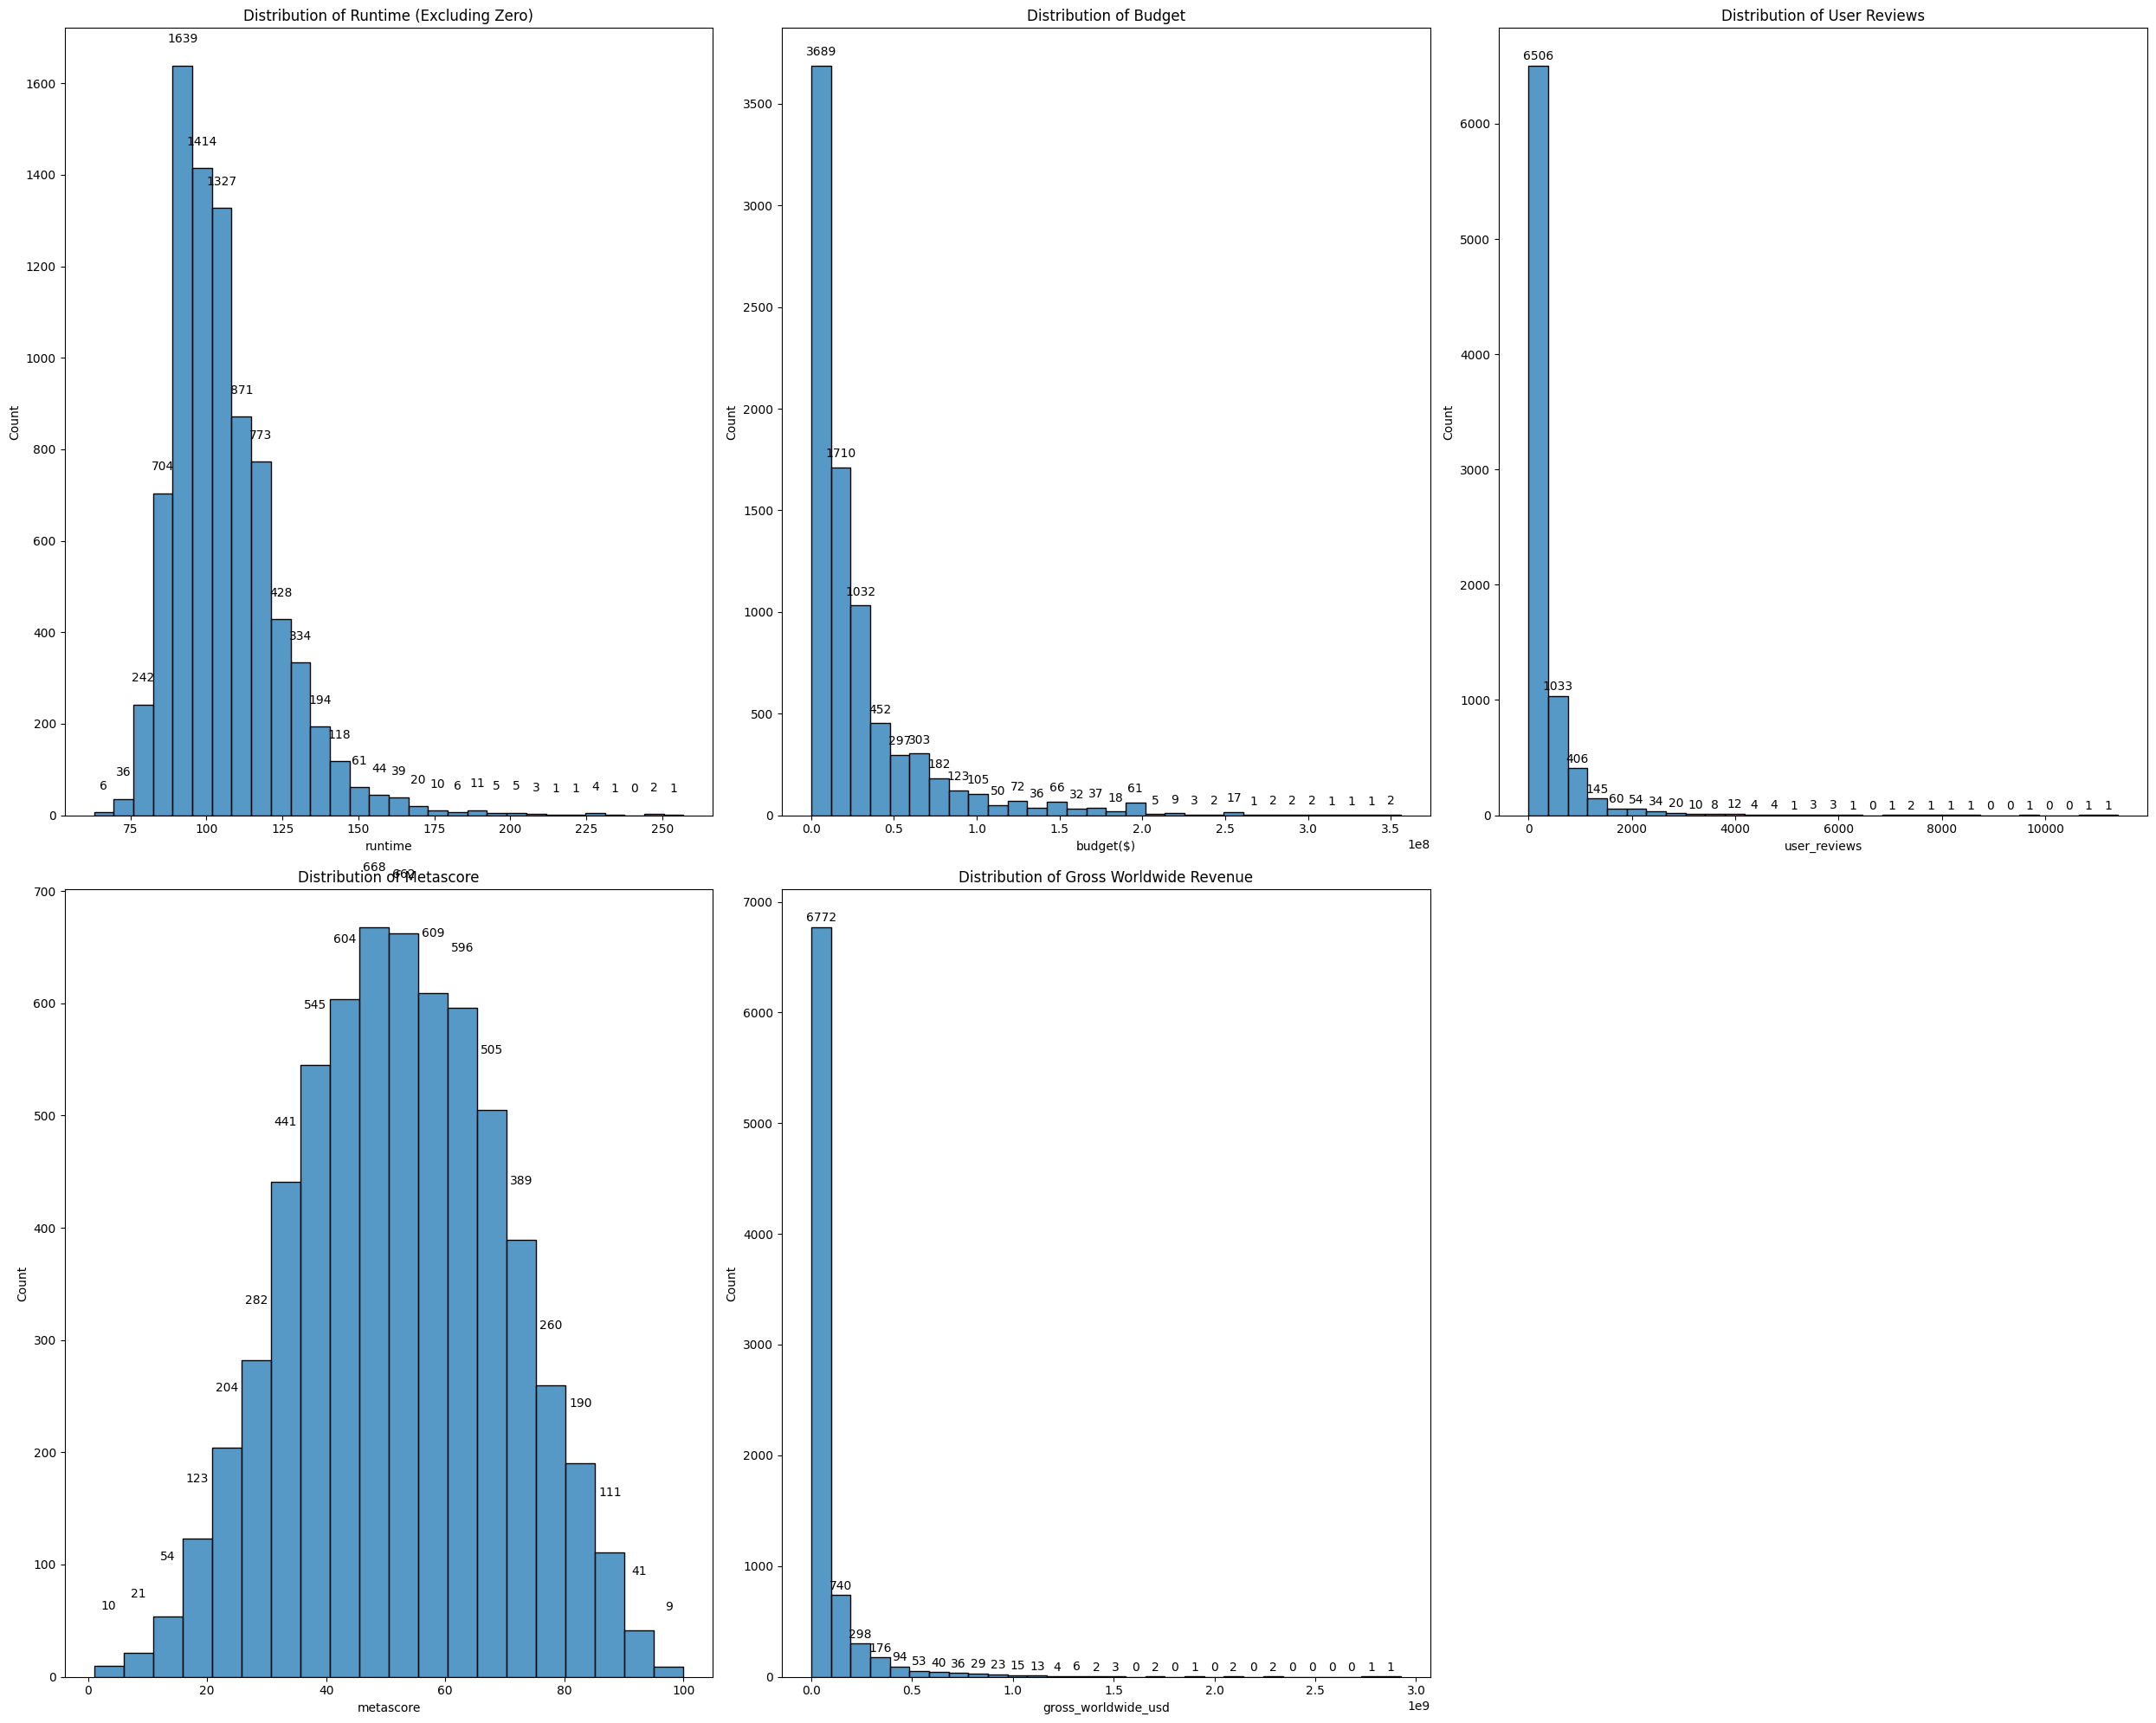

In [21]:
# Function to add labels on top of the bars
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x()+(p.get_width()/2),
                y = height+50,
                s = '{:.0f}'.format(height),
                ha = 'center')

# Plotting histograms for the 'runtime', 'budget($)', 'user_reviews', 'metascore', and 'gross_worldwide_usd' variables
plt.figure(figsize=(25, 20))

plt.subplot(2, 3, 1)
ax1 = sns.histplot(runtime_non_zero, kde=False, bins=30)
plt.title('Distribution of Runtime (Excluding Zero)')
add_labels(ax1)

plt.subplot(2, 3, 2)
ax2 = sns.histplot(budget, kde=False, bins=30)
plt.title('Distribution of Budget')
add_labels(ax2)

plt.subplot(2, 3, 3)
ax3 = sns.histplot(user_reviews, kde=False, bins=30)
plt.title('Distribution of User Reviews')
add_labels(ax3)

plt.subplot(2, 3, 4)
ax4 = sns.histplot(metascore, kde=False, bins=20)
plt.title('Distribution of Metascore')
add_labels(ax4)

plt.subplot(2, 3, 5)
ax5 = sns.histplot(gross_worldwide, kde=False, bins=30)
plt.title('Distribution of Gross Worldwide Revenue')
add_labels(ax5)

plt.tight_layout()
plt.show()


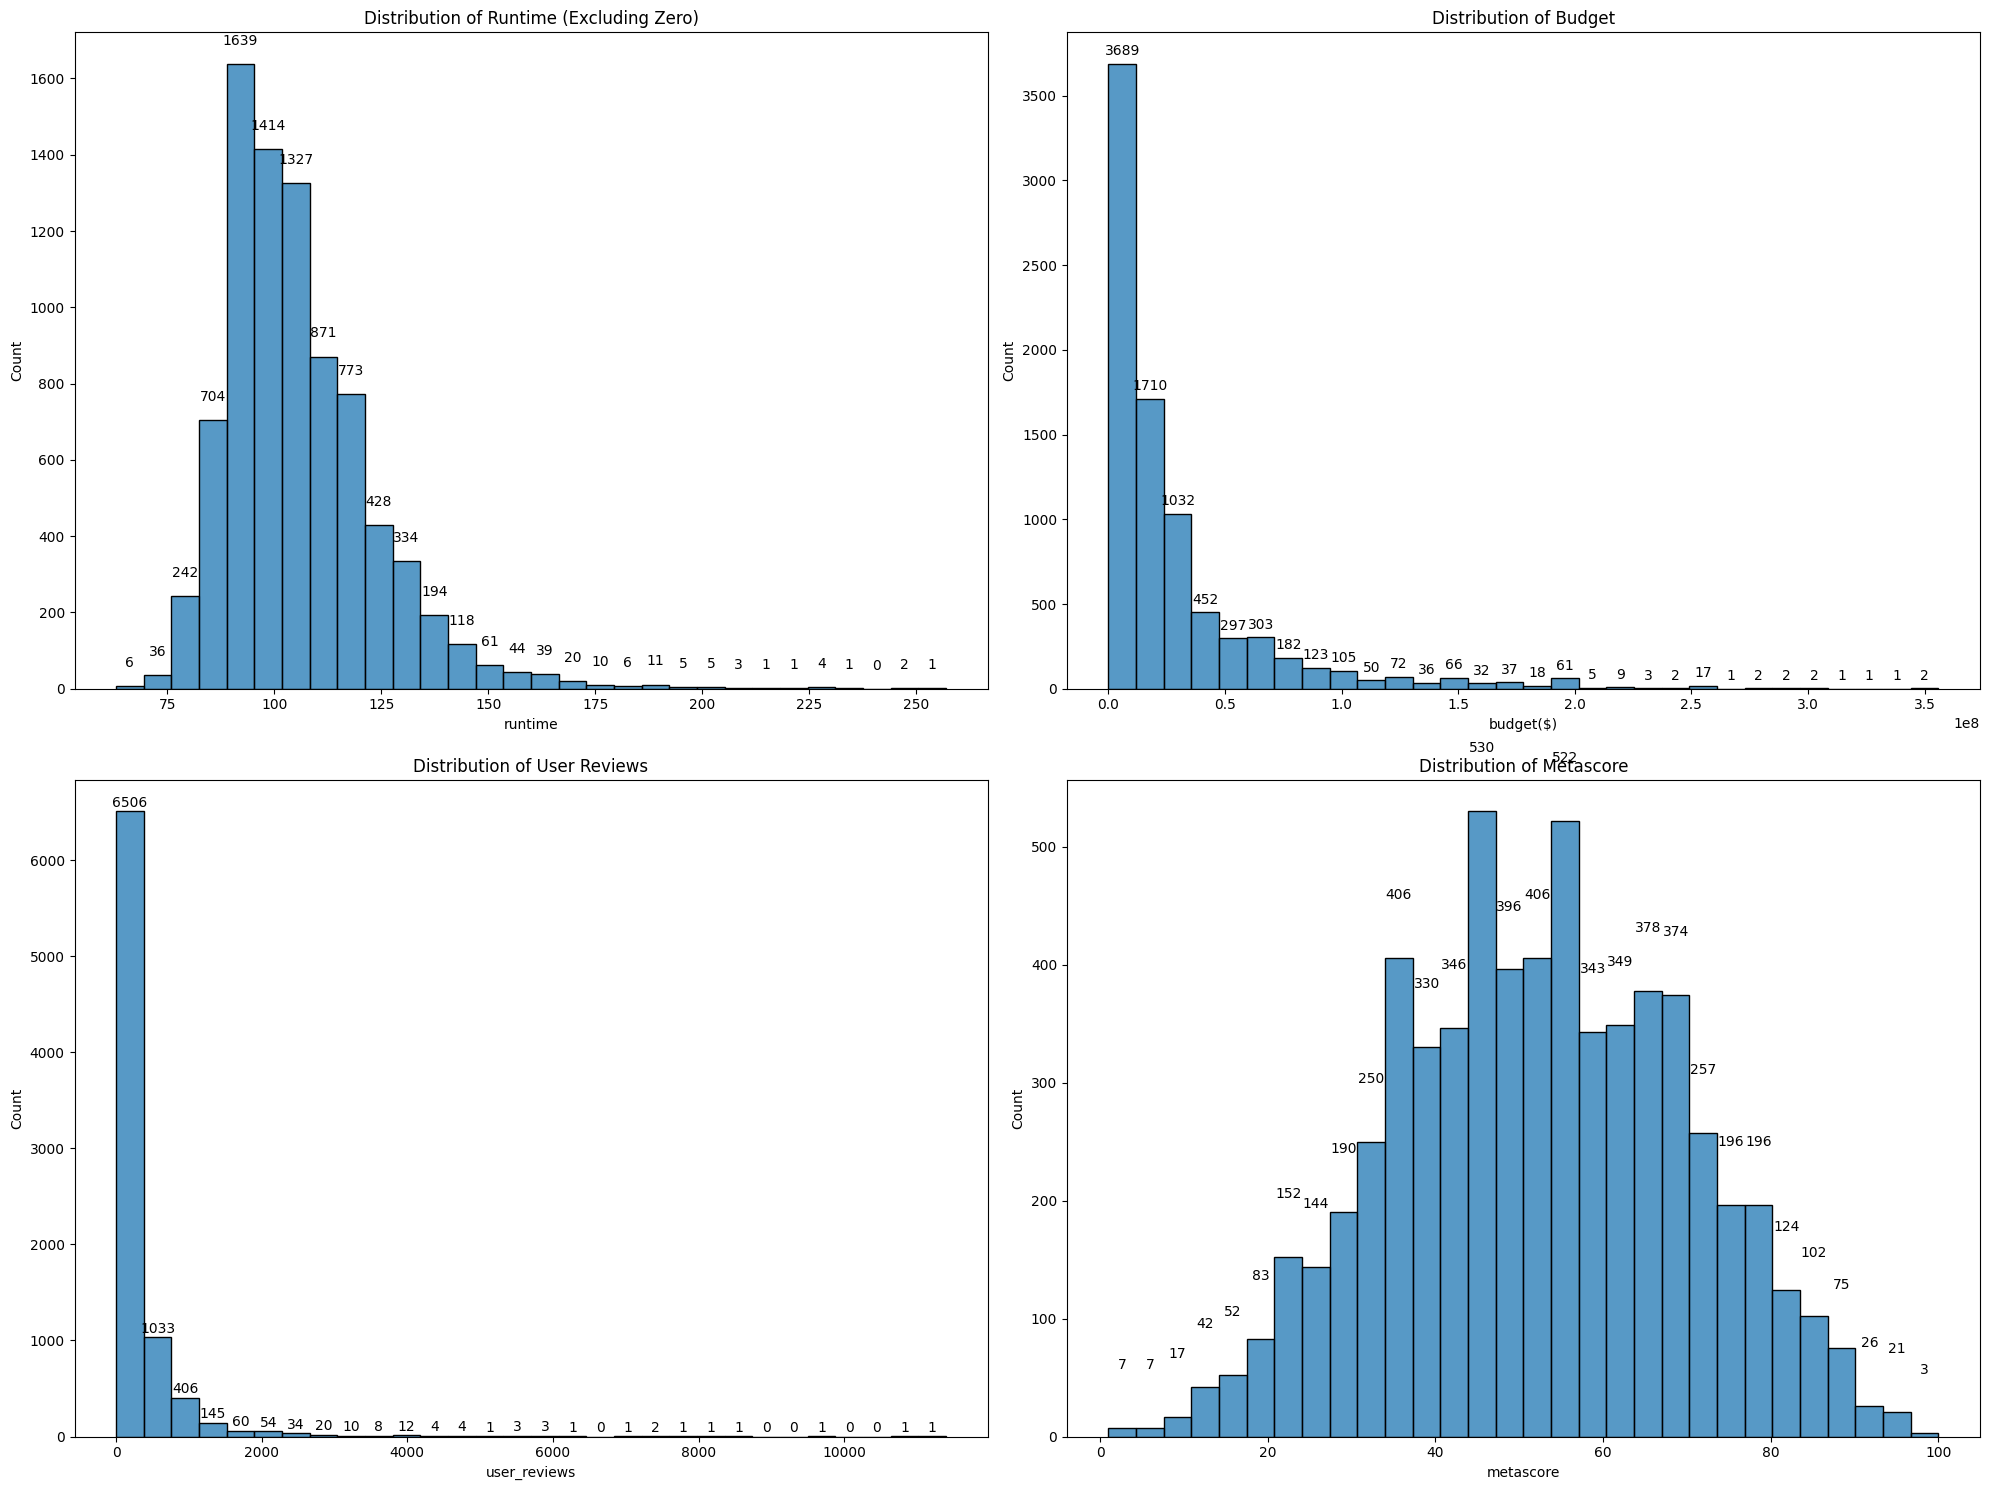

In [22]:
# Function to add labels on top of the bars
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x()+(p.get_width()/2),
                y = height+50,
                s = '{:.0f}'.format(height),
                ha = 'center')

# Plotting histograms for the 'runtime', 'budget($)', 'user_reviews', and 'metascore' variables
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
ax1 = sns.histplot(runtime_non_zero, kde=False, bins=30)
plt.title('Distribution of Runtime (Excluding Zero)')
add_labels(ax1)

plt.subplot(2, 2, 2)
ax2 = sns.histplot(budget, kde=False, bins=30)
plt.title('Distribution of Budget')
add_labels(ax2)

plt.subplot(2, 2, 3)
ax3 = sns.histplot(user_reviews, kde=False, bins=30)
plt.title('Distribution of User Reviews')
add_labels(ax3)

plt.subplot(2, 2, 4)
ax4 = sns.histplot(metascore, kde=False, bins=30)
plt.title('Distribution of Metascore')
add_labels(ax4)

plt.tight_layout()
plt.show()


### Correlation Analysis
In this section, we will compute the correlation between different variables in our dataset. Correlation is a statistical measure that expresses the extent to which two variables are linearly related. It's a common tool for understanding and predicting relationships between different variables.

We will compute a correlation matrix, which is a table showing correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data and find what variables are most related to each other.

To visualize the correlations, we will use a heatmap. Heatmaps make it easy to visualize complex data and understand it at a glance. They're incredibly useful for displaying the kind of data that we're looking at.

<ipython-input-23-cfc33348c04f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


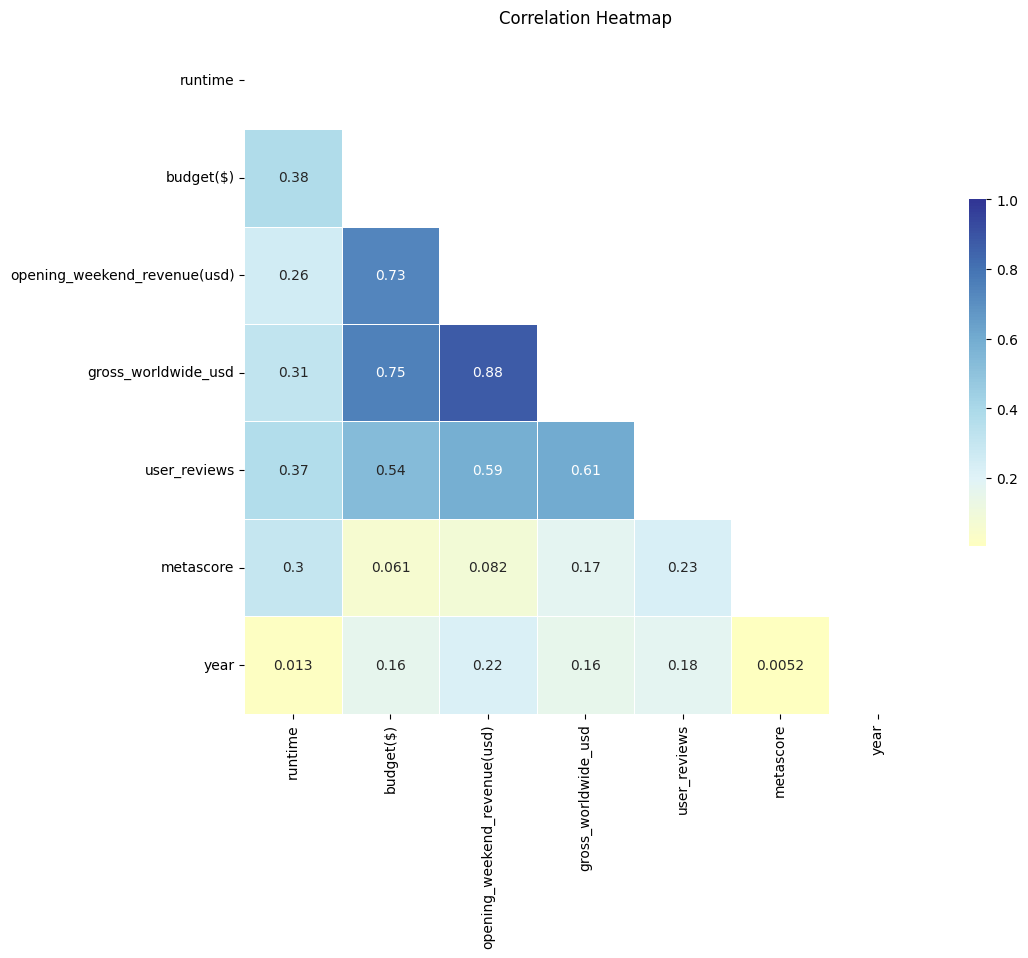

In [23]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdYlBu', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()


In [24]:
df.describe()

,runtime,budget($),opening_weekend_revenue(usd),gross_worldwide_usd,user_reviews,metascore,year
count,8313,8313,6877,8313,8313,6324,8310
mean,105,28063568,10570690,70513277,299,52,2005
std,18,39404966,20563638,165732725,559,17,11
min,0,70000,20,30,0,1,1980
25%,93,5000000,134005,1059071,43,40,1998
50%,102,14000000,3708918,13105853,129,52,2007
75%,114,33000000,12229529,60730568,331,65,2014
max,257,356000000,357115007,2923706026,11400,100,2023


In [25]:
df['gross_worldwide_usd']

2       2799439100
3       2320250281
4        704709660
5       2052415039
6       1334407706
           ...    
17058         8799
17086         8555
17094      3255426
17135        75504
17150        30312
Name: gross_worldwide_usd, Length: 8313, dtype: float64

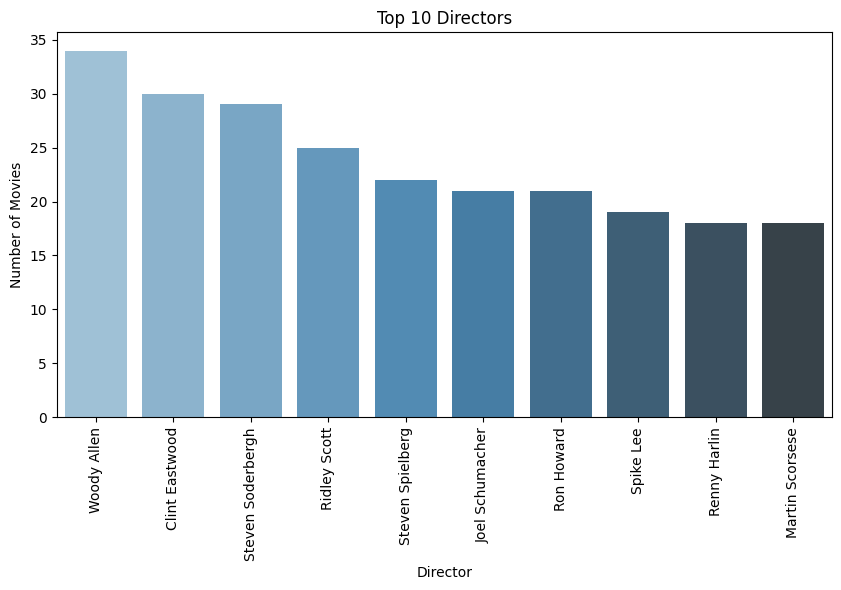

In [26]:
# Count the frequency of each director
director_counts = df['director'].value_counts()

# Get the top 10 directors
top_directors = director_counts[:10]

# Plot the frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="Blues_d")
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


## Genres

In this section, we will analyze the genres data to understand its impact on the success of a movie. The genres column contains a list of genres for each movie.

To make this data easier to analyze, we will create dummy variables for each genre. This will allow us to analyze the impact of each genre on the success of a movie.

In [27]:
# Split the genres column into separate genres and strip leading and trailing spaces
df_genres = df['genres'].str.split(',', expand=True).apply(lambda x: x.str.strip()).stack()

# Create dummy variables
df_genres = pd.get_dummies(df_genres, prefix='', prefix_sep='').groupby(level=0).sum()

# Concatenate the original DataFrame with the new `df_genres` dataframe
df = pd.concat([df, df_genres], axis=1)

In [28]:
# Dropping the previously created dummy columns in case I need to adjust
#df = df.drop(columns=df_genres.columns)

In [29]:
df.columns

Index(['imdb_id', 'title', 'runtime', 'sound_mix', 'aspect_ratio', 'budget($)',
       'budget_type', 'budget', 'gross_us_canada', 'opening_weekend_us_canada',
       'opening_weekend_revenue(usd)', 'opening_weekend_date',
       'gross_worldwide_usd', 'writers', 'release_date', 'release_location',
       'countries_of_origin', 'official_sites', 'director', 'stars',
       'user_reviews', 'metascore', 'languages', 'also_known_as',
       'filming_locations', 'production_companies', 'download_slot',
       'redirect_urls', 'redirect_reasons', 'plot_summaries', 'synopsis',
       'reviewer_ratings', 'color', 'camera', 'laboratory', 'film_length',
       'negative_format', 'cinematographic_process', 'printed_film_format',
       'review_site_names', 'review_site_urls', 'genres', 'budget_format',
       'year', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-F

### Genres against revenue

In this section, we will compute the average gross revenue per movie for each genre in each year. This will give us a more accurate picture of the success of each genre, as it takes into account the number of movies released in that genre in a given year.

In [30]:
# Compute the average gross worldwide revenue for each genre
genre_revenue = df_genres.mul(df['gross_worldwide_usd'], axis=0).mean()

Bar Chart of Gross Revenue over Time

In [31]:
import plotly.express as px

# Melt the dataframe to have genres in one column and gross revenue in another
df_melt = df.melt(id_vars=['title', 'year', 'gross_worldwide_usd'], value_vars=df_genres.columns)

# Filter out rows where value is 0
df_melt = df_melt[df_melt['value'] != 0]

# Compute the total gross revenue for each genre in each year
df_grouped = df_melt.groupby(['year', 'variable'])['gross_worldwide_usd'].sum().reset_index()


# Filter the data to only include movies released after 1996
df_grouped = df_grouped[df_grouped['year'] > 1996]

# Create the animated bar chart with custom colors
fig = px.bar(df_grouped, x='variable', y='gross_worldwide_usd', animation_frame='year',
             title='Total Gross Revenue by Genre Over Time', labels={'variable': 'Genre', 'gross_worldwide_usd': 'Gross Revenue'},
             color='variable', color_continuous_scale='Rainbow')

fig.show()

In [32]:
# Create the animated bar chart
fig = px.bar(df_grouped, x='variable', y='gross_worldwide_usd', animation_frame='year',
             title='Average Gross Revenue per Movie by Genre Over Time', labels={'variable': 'Genre', 'gross_worldwide_usd': 'Average Gross Revenue'},color='variable', color_continuous_scale='Rainbow')

fig.show()


### Line Chart


In this section, we will create a line chart to visualize the total gross revenue for each genre over time.

**Each line in the chart will represent a different genre.**

In [33]:
# Create the line chart
fig = px.line(df_grouped, x='year', y='gross_worldwide_usd', color='variable',
              title='Total Gross Revenue by Genre Over Time', labels={'variable': 'Genre', 'gross_worldwide_usd': 'Gross Revenue'})

fig.show()


## **Time Series Analysis** for Genres

Trend analysis involves **examining a time series to identify underlying patterns or trends**. These trends could be increasing or decreasing over time.

### Forecasting Average Gross Revenue by Genre

In this section, we are performing a time series forecasting of the average gross revenue for each movie genre. The goal is to predict future revenues for each genre, which can help us understand which genres are expected to be most profitable in the future.

We start by grouping the data by genre and year, and then computing the average gross worldwide revenue for each group. This gives us a time series of average gross revenues for each genre.

A simple linear regression model to forecast future revenues for each genre. Linear regression is a simple and commonly used forecasting method that assumes a linear relationship between the independent variable (in this case, the year) and the dependent variable (the average gross revenue).

A separate linear regression model for each genre is fit, using the historical data to train the model. We then use the model to forecast the average gross revenue for the next three years.

The forecasts are stored in a dictionary, which is then converted to a DataFrame for easier manipulation. We also create a DataFrame of the historical data for comparison.

Finally the historical data and forecasts are visualized using a line chart. Each line represents a genre, and the predicted and historical trends are seperated by a vertical line at the year 2024

This analysis can provide valuable insights into the expected profitability of different genres in the future. However, it's important to note that these are just forecasts based on historical data, and actual future revenues may be influenced by many other factors not included in this model.

Training the model

In [34]:
from sklearn.linear_model import LinearRegression

# Initialize an empty dictionary to store the forecast dataframes
forecasts = {}

# Loop over each genre
for genre in df_genres.columns:
    # Filter the data for the current genre
    df_genre = df[df[genre] == 1]

    # Group by year and compute the average gross revenue
    df_grouped = df_genre.groupby('year')['gross_worldwide_usd'].mean().reset_index()

    # Initialize a Linear Regression model
    model = LinearRegression()

    # Fit the model
    model.fit(df_grouped[['year']], df_grouped['gross_worldwide_usd'])

    # Make a dataframe for future predictions
    future_years = pd.DataFrame({'year': range(int(df_grouped['year'].max())+1, int(df_grouped['year'].max())+4)})

    # Make the forecast
    forecast = model.predict(future_years)

    # Store the forecast in the dictionary
    forecasts[genre] = forecast


Plotting out historical and forecasts

In [35]:
import plotly.graph_objects as go

# Get the 10 most common genres
top_genres = df_genres.sum().sort_values(ascending=False).head(8).index

# Initialize an empty dictionary to store the historical data
historical = {}

# Loop over each of the top genres
for genre in top_genres:
    # Filter the data for the current genre
    df_genre = df[df[genre] == 1]

    # Filter for years from 1996 onwards
    df_genre = df_genre[df_genre['release_date'].dt.year >= 1996]

    # Group by year and compute the average gross revenue
    df_grouped = df_genre.groupby(df_genre['release_date'].dt.year)['gross_worldwide_usd'].mean().reset_index()

    # Store the historical data in the dictionary
    historical[genre] = df_grouped.set_index('release_date')['gross_worldwide_usd']

# Convert the historical data dictionary to a DataFrame
df_historical = pd.DataFrame(historical)

# Filter the forecasts for the top genres
forecasts_top_genres = {genre: forecasts[genre] for genre in top_genres if genre in forecasts}

# Convert the forecasts dictionary to a DataFrame
df_forecasts = pd.DataFrame(forecasts_top_genres, index=range(int(df['release_date'].dt.year.max())+1, int(df['release_date'].dt.year.max())+4))

# Concatenate the historical data and forecasts
df_combined = pd.concat([df_historical, df_forecasts])

# Create an empty figure
fig = go.Figure()

# Add a line to the figure for each genre
for genre in df_combined.columns:
    if genre != 'nan':  # Exclude 'nan' column
      fig.add_trace(go.Scatter(x=df_combined.index, y=df_combined[genre], mode='lines', name=genre))

# Add a vertical line at 2024
fig.add_shape(
    type="line",
    x0=2024, y0=0, x1=2024, y1=1,
    yref='paper',
    line=dict(
        color="gray",
        width=2,
        dash="dashdot",
    )
)


# Update the layout
fig.update_layout(title='Historical and Forecasted Average Gross Revenue by Genre',
                   xaxis_title='Year',
                   yaxis_title='Average Gross Revenue',
                   yaxis=dict(
                       tickformat = ',.0f'  # Format y-axis tick labels as whole numbers
                   ),
                  xaxis=dict(
                    tick0=1996,
                    dtick=2
    ))

# Show the figure
fig.show()


Change point detection is a technique used to identify points in a time series where the properties of the data change. This could be a change in mean, variance, distribution, or other properties. In our case, we are looking for points in time where there was a significant change in the gross worldwide revenue for the 'Action' genre.



## End of EDA Section

---

# Building a Predictive model


Next, we will build a predictive model that predicts the profit based on various factors such as directors, writers, stars, production companies, and others.

Before we can build the model, we need to preprocess our data. This involves converting categorical variables into a format that can be used in our model, handling missing values, and potentially scaling our data.

Once our data is preprocessed, we can split it into a training set and a test set, train our model on the training set, and evaluate its performance on the test set.

### Creating a profit metric

We will create a new column named profit which will be the difference between gross_worldwide_usd and budget($). This will serve as our metric for the success of a movie.

In [36]:
# Create a new column 'profit' which is the difference between 'gross_worldwide_usd' and 'budget($)'
df['profit'] = df['gross_worldwide_usd'] - df['budget($)']

## **Preprocessing**
In this section, we will preprocess our data to prepare it for modeling. This involves:

Handling Categorical Variables: Many machine learning models require the input data to be numerical. We will convert categorical variables such as director, writers, stars, and production_companies into a format that can be used in our model. One common approach is one-hot encoding, which creates new binary columns for each category/label.

Handling Missing Values: Our dataset may contain missing values. We need to decide how to handle them, as many machine learning algorithms do not support missing values. One approach is to fill missing values with a certain value (like the mean or median), another is to remove any rows with missing values.

Feature Scaling: Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors.

One-hot encoding for director column

In [37]:
# # Perform one-hot encoding for the 'director' column
# df_director = pd.get_dummies(df['director'])

# # Concatenate the original DataFrame with the new `df_director` dataframe
# df = pd.concat([df, df_director], axis=1)

In [38]:
# # Define a function to one-hot encode the top N values in a column
# def one_hot_encode_top_n(df, column, n=50):
#     # Split the column into separate values
#     df_split = df[column].str.get_dummies(sep=', ')

#     # Get the top N values
#     top_n = df_split.sum().nlargest(n).index

#     # One-hot encode the top N values
#     df_encoded = df_split[top_n]

#     return df_encoded

# # One-hot encode the top 50 values in the 'writers', 'stars', and 'production_companies' columns
# df_writers = one_hot_encode_top_n(df, 'writers')
# df_stars = one_hot_encode_top_n(df, 'stars')
# df_production_companies = one_hot_encode_top_n(df, 'production_companies')

# # Concatenate the original DataFrame with the new dataframes
# df = pd.concat([df, df_writers, df_stars, df_production_companies], axis=1)


### **Handling Missing Values**

Remove Rows: This strategy involves removing entire rows that contain missing values. This is often acceptable when the rows with missing values are a small fraction of the total data.

Impute Missing Values: This strategy involves filling missing values with a certain value. The simplest option is to fill missing values with a central tendency measure such as the mean or median. Another option is to use a machine learning algorithm to predict the missing values.

Ignore the Missing Values: This strategy involves ignoring the missing values and leaving them as they are. This is often acceptable when the data is going to be used in an algorithm that supports missing values.

In [39]:
df.shape

(8313, 66)

In [40]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()

# Filter out the columns that don't have any missing values
missing_values = missing_values[missing_values > 0]

# Display the results
print(missing_values)

gross_us_canada                 1175
opening_weekend_revenue(usd)    1436
opening_weekend_date            1436
writers                         5175
release_date                       3
release_location                   3
countries_of_origin             5175
official_sites                  3370
director                          34
stars                             30
metascore                       1989
also_known_as                    179
filming_locations                433
production_companies              40
synopsis                          53
color                            114
camera                          2364
laboratory                      2482
film_length                     5229
negative_format                 1529
cinematographic_process         1655
printed_film_format             1245
review_site_names                 92
review_site_urls                  92
year                               3
dtype: int64


In [41]:
# Fill in missing values in the 'metascore' column with the median
df['metascore'].fillna(df['metascore'].median(), inplace=True)

# Drop the 'film_length' column
df.drop('film_length', axis=1, inplace=True)

In [42]:
# Fill in missing values in the 'writers' column with 'Unknown'
df['writers'].fillna('Unknown', inplace=True)

### **Topic Modeling for Plot Summaries**

In this section, we use a technique called Topic Modeling to categorize the plot summaries into different topics. Topic modeling is a type of statistical modeling for discovering the abstract "topics" that occur in a collection of documents. In our case, the documents are the plot summaries of the movies.

We use a specific method for topic modeling called Latent Dirichlet Allocation (LDA). LDA assumes that each document (in our case, a plot summary) is a mixture of a certain number of topics, and that each word in the document is attributable to one of the document's topics.


Here's a step-by-step breakdown of what we did:

1. **Vectorize the Plot Summaries**: We first convert the plot summaries into a format that can be processed by our LDA model. This involves converting each plot summary into a vector, where each element of the vector represents a specific word and its frequency in the plot summary.

2. **Fit the LDA Model**: We then fit the LDA model to our vectorized plot summaries. The model learns the relationships between the words and identifies clusters of words that often appear together. These clusters represent our topics.

3. **Assign Topics to Movies**: After the model is trained, we use it to assign a topic to each movie. The topic is chosen based on the words in the plot summary and the topics that the model has learned.

4. **Name the Topics**: Finally, we name each topic based on the most common words in that topic. This gives us an intuitive understanding of what each topic represents.


Objective: The purpose of this process is to categorize our movies into different topics based on their plot summaries. This gives us a new feature that we can use in our predictive model. For example, we might find that movies from certain topics tend to be more successful than others, which would be valuable information for predicting the success of future movies.

### **LDA**

In [43]:
# # Import the necessary libraries for LDA
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# # Create a CountVectorizer for the 'synopsis' column
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# # Fit and transform the 'synopsis' column
# synopsis_vectorized = vectorizer.fit_transform(df['plot_summaries'].values.astype('U'))

# # Create an LDA model
# lda = LatentDirichletAllocation(n_components=15, random_state=42)

# # Fit the LDA model to the vectorized 'synopsis' data
# lda.fit(synopsis_vectorized)

# # Get the top 10 words for each topic
# topic_keywords = {}
# for topic_idx, topic in enumerate(lda.components_):
#     topic_keywords["Topic" + str(topic_idx)] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-15 - 1:-1]]

# # Display the top 10 words for each topic
# for topic, keywords in topic_keywords.items():
#     print(topic + ':')
#     print(', '.join(keywords))
#     print('\n')

Based on the LDA output, here are our topics:

    0: 'Earth and Alien Invasion': "earth, world, sam, new, young, alien, fight, group, city, save, planet, years, man, way, crew"
    
    1: 'Family and School Life': "mother, school, life, parents, old, year, alex, friends, father, friend, family, young, man, house, kate"
    
    2: 'Friendship and Love': "life, nick, new, mary, young, man, peter, movie, friends, friend, family, story, way, wants, love"

    3: 'Fantasy and Royalty': "evil, king, world, save, war, story, man, young, princess, queen, named, power, vampire, years, prince"

    4: 'City Life and Adventure': "man, world, new, dave, father, city, people, dr, earth, help, joe, young, way, peter, finds"

    5: 'War and Brotherhood': "war, life, family, american, world, story, father, young, bond, new, years, time, lives, german, brother"

    6: 'School Life and Teachers': "school, new, john, life, michael, high, teacher, mother, years, students, max, young, time, way, boy"

    7: 'Crime and Money': "money, bank, game, prison, new, kevin, mob, million, city, plan, boss, man, time, heist, years"

    8: 'Family and Pets': "world, life, new, family, son, molly, jason, boxing, years, young, father, dog, group, help, time"

    9: 'Music and New York': "life, new, world, music, young, story, time, film, love, york, father, years, band, make, american"

    10: 'Family and Home': "family, life, father, old, mother, son, young, house, home, year, love, town, man, new, night"

    11: 'Police and Crime': "agent, police, team, drug, detective, mission, cop, fbi, killed, secret, murder, killer, officer, cia, new"

    12: 'Work and College': "life, new, job, frank, woman, year, lawyer, just, case, gets, college, sex, killer, friends, finds"

    13: 'Love and Relationships': "life, love, new, man, woman, wife, young, husband, finds, time, story, york, meets, relationship, home"

    14: 'High School and Friendship': "school, high, team, life, mike, friends, best, friend, time, father, old, new, year, gets, help"

In [44]:
# # Transform the vectorized 'plot_summaries' data to get the topic probabilities for each movie
# topic_probabilities = lda.transform(synopsis_vectorized)

# # Get the topic with the highest probability for each movie
# df['plot_summary_topic'] = np.argmax(topic_probabilities, axis=1)

# # Create a mapping from topic number to topic name
# topic_mapping = {
#     0: 'Earth and Alien Invasion',
#     1: 'Family and School Life',
#     2: 'Friendship and Love',
#     3: 'Fantasy and Royalty',
#     4: 'City Life and Adventure',
#     5: 'War and Brotherhood',
#     6: 'School Life and Teachers',
#     7: 'Crime and Money',
#     8: 'Family and Pets',
#     9: 'Music and New York',
#     10: 'Family and Home',
#     11: 'Police and Crime',
#     12: 'Work and College',
#     13: 'Love and Relationships',
#     14: 'High School and Friendship'
# }

# # Replace the topic numbers with topic names
# df['plot_summary_topic'] = df['plot_summary_topic'].map(topic_mapping)


### **BERTopic (Replacement from LDA)**

In [45]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

In [47]:
from bertopic import BERTopic

# Create a BERTopic model without specifying the number of topics
topic_model = BERTopic(calculate_probabilities=True, verbose=True)

# Create a BERTopic model with the specified models
topic_model = BERTopic(vectorizer_model=vectorizer_model,
                       calculate_probabilities=True,
                       umap_model=umap_model,
                       hdbscan_model=hdbscan_model,
                       verbose=True)


# Fit the BERTopic model to the 'plot_summaries' column
topics, _ = topic_model.fit_transform(df['plot_summaries'].values.astype('U'))

# Get the current number of topics
current_nr_topics = len(set(topics))


# Check the size of each topic
topic_sizes = topic_model.get_topic_freq()

# Display the size of each topic
print(topic_sizes)

# Display the topics and their keywords
topic_keywords = topic_model.get_topic_info()



Batches:   0%|          | 0/260 [00:00<?, ?it/s]

2023-08-24 04:20:02,709 - BERTopic - Transformed documents to Embeddings
2023-08-24 04:20:15,053 - BERTopic - Reduced dimensionality
2023-08-24 04:20:17,855 - BERTopic - Clustered reduced embeddings


    Topic  Count
1      -1   4250
2       0    636
18      1    477
6       2    239
9       3    163
..    ...    ...
69     67     11
36     68     11
62     69     10
48     70     10
70     71     10

[73 rows x 2 columns]


In [48]:
topic_keywords

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4250,-1_the_to_and_of,"[the, to, and, of, in, his, is, he, her, with]",[['When a group of misfits are hired by an unk...
1,0,636,0_the_his_to_is,"[the, his, to, is, he, and, of, in, with, that]","[[""A thief with a unique code of professional ..."
2,1,477,1_her_she_and_to,"[her, she, and, to, with, their, in, is, for, ...",[['A thirty-something preschool teacher looks ...
3,2,239,2_the_king_of_and,"[the, king, of, and, to, prince, evil, by, in,...",[['A small-time magician is swept away to an e...
4,3,163,3_earth_alien_space_the,"[earth, alien, space, the, planet, to, of, ali...","[['As the sun is dying out, people all around ..."
...,...,...,...,...,...
68,67,11,67_porn_film_zack_dirk,"[porn, film, zack, dirk, industry, actress, st...",[['An insane independent film director and his...
69,68,11,68_bella_bellas_edward_beca,"[bella, bellas, edward, beca, cullen, cullens,...",[['The Quileutes close in on expecting parents...
70,69,10,69_jesus_nazareth_birth_christ,"[jesus, nazareth, birth, christ, mary, joseph,...",[['An attorney receives a dinner invitation fr...
71,70,10,70_crowe_her_sam_cole,"[crowe, her, sam, cole, psychologist, she, nix...",[['The oncologist wife of a prominent child ps...


### **User Reviews Analysis**

In this section, we will be analyzing the user reviews data. User reviews provide valuable insights into viewers' opinions about the movies. They can tell us what viewers liked or disliked about a movie, which can be very useful information when trying to predict the success of a movie.

Our goal in this section is to perform **aspect-based sentiment analysis** (ABSA) on the user reviews. ABSA is a method of sentiment analysis that not only identifies the sentiment (positive, negative, neutral) expressed in a text, but also the aspect or feature of the product that the sentiment is about. For movie reviews, potential aspects could be things like "acting", "plot", "cinematography", "special effects", etc.

The process of ABSA can be divided into three main steps:

* Aspect Extraction: First, we need to identify the aspects or features that viewers are talking about in the reviews. This could be done using techniques like Named Entity Recognition (NER) or dependency parsing.

* Aspect-Based Sentiment Classification: Once we've identified the aspects, the next step is to determine the sentiment of the text related to each aspect. This could be done using sentiment analysis models, which could be rule-based, machine learning-based, or deep learning-based.

* Aggregation: Finally, we can aggregate the aspect-sentiment pairs for each movie to get an overall sentiment score for each aspect. This could give us an idea of what viewers liked or disliked about each movie.


In [49]:
# Import only the specific columns from the CSV file
sentences_df = pd.read_csv("/content/drive/MyDrive/IMDB Project/review_analysis/data/30x2500sentences_topic_labelled.csv")

In [50]:
sentences_df

,imdb_id,sentence,Topic_ID,Mapped_Seed_Topic_Labels
0,tt0035423,"i really just adore actor, and my low rating o...",-1,['None']
1,tt0035423,thats out of question.,-1,['None']
2,tt0035423,also i cannot say that the plot is without int...,-1,['None']
3,tt0035423,"the thing is, this movie seems to resemble the...",543,['None']
4,tt0035423,and i think the filmmakers actually did not ev...,-1,['None']
...,...,...,...,...
621120,tt9777666,and theyre it a real big problem on the movie.,109,['None']
621121,tt9777666,but the graphics are good.,1854,['None']
621122,tt9777666,and the acteurs are good.,-1,['None']
621123,tt9777666,and the sounds are good.,-1,['None']


#### **Aspect-Based Sentiment Analysis**

In this section, we will perform aspect-based sentiment analysis on the reviews. Aspect-based sentiment analysis is a more detailed form of sentiment analysis that not only identifies the sentiments expressed in the text, but also the aspects or features that these sentiments are associated with.

In our case, the aspects are the different elements of a movie that a viewer might comment on in their review, such as the actors, plot, cinematography, etc. We have a predefined list of aspects that we're interested in, and for each review, we want to know the sentiment scores associated with each of these aspects.



In [51]:
# Filter out rows where the "Mapped_Seed_Topic_Labels" column contains ['None']
filtered_sentences_df = sentences_df[sentences_df['Mapped_Seed_Topic_Labels'] != "['None']"]

# Display the first few rows of the filtered dataframe
filtered_sentences_df

,imdb_id,sentence,Topic_ID,Mapped_Seed_Topic_Labels
32,tt0035423,i am a history professor and this film is accu...,128,['Critique']
38,tt0035423,it has a much more satisfying ending than you ...,7,"['Twist', 'Joy & Humor']"
43,tt0035423,who the hell has been giving her plastic surge...,1,['Costume & Makeup']
57,tt0035423,actor is good.,23,['Acting']
58,tt0035423,"professional, elegant, regally haughty but lon...",1,['Costume & Makeup']
...,...,...,...,...
621050,tt9777666,wouldve liked to see some character developmen...,4,['Acting']
621082,tt9777666,"yes, i agree that some plot holes were there i...",548,['Plot']
621090,tt9777666,the cinematography done by larry fong added a ...,86,"['Plot', 'Suspense']"
621097,tt9777666,later on in the film we run into another plot ...,548,['Plot']


In [52]:
!pip install transformers

In [53]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from tqdm import tqdm

# Load the pre-trained BERT model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name).cpu()  # Ensure the model runs on CPU

# Create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=-1)  # Setting device to -1 ensures CPU usage

# Function to get sentiment polarity using BERT
def get_sentiment_polarity_bert(text):
    # Truncate the text to fit within BERT's maximum token limit using the tokenizer's encode method
    encoded_text = tokenizer.encode(text, truncation=True, max_length=512, return_tensors="pt")
    truncated_text = tokenizer.decode(encoded_text[0], skip_special_tokens=True)

    result = nlp(truncated_text)[0]
    label = int(result['label'].split()[0])  # Extract the sentiment score (1 to 5) correctly
    # Convert the score to a polarity (-1 to 1)
    polarity = (label - 3) / 2
    return polarity

# Apply the function to the sentence column with a progress bar
filtered_sentences_df['Sentiment_Polarity'] = [get_sentiment_polarity_bert(sentence) for sentence in tqdm(filtered_sentences_df['sentence'])]


100%|██████████| 76754/76754 [34:41<00:00, 36.88it/s]


In [ ]:
# from transformers import BertTokenizer, BertForSequenceClassification, pipeline
# from tqdm import tqdm

# # Load the pre-trained BERT model and tokenizer
# model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertForSequenceClassification.from_pretrained(model_name).cpu()  # Ensure the model runs on CPU

# # Create a sentiment analysis pipeline
# nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=-1)  # Setting device to -1 ensures CPU usage

# # Function to get sentiment polarity using BERT
# def get_sentiment_polarity_bert(text):
#     # Tokenize and truncate
#     tokens = tokenizer.tokenize(text)
#     if len(tokens) > 510:  # reserving 2 tokens for [CLS] and [SEP]
#         tokens = tokens[:510]

#     # Convert back to text string
#     truncated_text = tokenizer.convert_tokens_to_string(tokens)

#     result = nlp(truncated_text)[0]
#     label = int(result['label'].split()[0])  # Extract the sentiment score (1 to 5) correctly
#     # Convert the score to a polarity (-1 to 1)
#     polarity = (label - 3) / 2
#     return polarity

# # Apply the function to the sentence column with a progress bar
# filtered_sentences_df['Sentiment_Polarity'] = [get_sentiment_polarity_bert(sentence) for sentence in tqdm(filtered_sentences_df['sentence'])]


### Compiling Each Movie ID with the respective topic based sentiments


Expanding rows containing multiple topic labels into separate rows.

In [55]:
filtered_sentences_df

,imdb_id,sentence,Topic_ID,Mapped_Seed_Topic_Labels,Sentiment_Polarity
32,tt0035423,i am a history professor and this film is accu...,128,['Critique'],1
38,tt0035423,it has a much more satisfying ending than you ...,7,"['Twist', 'Joy & Humor']",0
43,tt0035423,who the hell has been giving her plastic surge...,1,['Costume & Makeup'],-1
57,tt0035423,actor is good.,23,['Acting'],0
58,tt0035423,"professional, elegant, regally haughty but lon...",1,['Costume & Makeup'],0
...,...,...,...,...,...
621050,tt9777666,wouldve liked to see some character developmen...,4,['Acting'],0
621082,tt9777666,"yes, i agree that some plot holes were there i...",548,['Plot'],-1
621090,tt9777666,the cinematography done by larry fong added a ...,86,"['Plot', 'Suspense']",0
621097,tt9777666,later on in the film we run into another plot ...,548,['Plot'],-0


In [56]:
import ast

def convert_to_list(entry):
    if isinstance(entry, str):
        return ast.literal_eval(entry)
    return entry

# Convert the string representation of list to actual list
filtered_sentences_df['Mapped_Seed_Topic_Labels'] = filtered_sentences_df['Mapped_Seed_Topic_Labels'].apply(convert_to_list)

# Expand the rows with multiple topic labels into separate rows
expanded_data = filtered_sentences_df.explode('Mapped_Seed_Topic_Labels')

# Display the first few rows of the expanded dataframe
expanded_data.head()


,imdb_id,sentence,Topic_ID,Mapped_Seed_Topic_Labels,Sentiment_Polarity
32,tt0035423,i am a history professor and this film is accu...,128,Critique,1
38,tt0035423,it has a much more satisfying ending than you ...,7,Twist,0
38,tt0035423,it has a much more satisfying ending than you ...,7,Joy & Humor,0
43,tt0035423,who the hell has been giving her plastic surge...,1,Costume & Makeup,-1
57,tt0035423,actor is good.,23,Acting,0


In [57]:
expanded_data

,imdb_id,sentence,Topic_ID,Mapped_Seed_Topic_Labels,Sentiment_Polarity
32,tt0035423,i am a history professor and this film is accu...,128,Critique,1
38,tt0035423,it has a much more satisfying ending than you ...,7,Twist,0
38,tt0035423,it has a much more satisfying ending than you ...,7,Joy & Humor,0
43,tt0035423,who the hell has been giving her plastic surge...,1,Costume & Makeup,-1
57,tt0035423,actor is good.,23,Acting,0
...,...,...,...,...,...
621082,tt9777666,"yes, i agree that some plot holes were there i...",548,Plot,-1
621090,tt9777666,the cinematography done by larry fong added a ...,86,Plot,0
621090,tt9777666,the cinematography done by larry fong added a ...,86,Suspense,0
621097,tt9777666,later on in the film we run into another plot ...,548,Plot,-0


It seems like the sentiment analysis is quite accurate!

Next, compute the average sentiment for each topic label for every movie (imdb_id). This will be done by grouping by imdb_id and Mapped_Seed_Topic_Labels and then computing the mean sentiment.

In [58]:
# Group by imdb_id and Mapped_Seed_Topic_Labels and compute the count of each topic
topic_counts = expanded_data.groupby(['imdb_id', 'Mapped_Seed_Topic_Labels']).size().unstack().reset_index()
topic_counts.columns = [col + '_topic_count' if col != 'imdb_id' else col for col in topic_counts.columns]

In [59]:
# Group by imdb_id and Mapped_Seed_Topic_Labels and compute the average sentiment
average_sentiment = expanded_data.groupby(['imdb_id', 'Mapped_Seed_Topic_Labels'])['Sentiment_Polarity'].mean().unstack().reset_index()

In [60]:
# Merge the average sentiment dataframe with the topic counts dataframe on imdb_id
compiled_data = pd.merge(average_sentiment, topic_counts, on='imdb_id')

In [61]:
average_sentiment

Mapped_Seed_Topic_Labels,imdb_id,Acting,Action,Advertisement,Cinematography,Costume & Makeup,Critique,Direction,Editing,Effects,Emotion,Excitement & Energy,Franchise,Joy & Humor,Plot,Production,Screenplay,Soundtrack,Suspense,Twist
0,tt0035423,0,NaN,NaN,-0,0,0,1,-0,NaN,NaN,NaN,NaN,0,NaN,NaN,-1,0,NaN,0
1,tt0080855,-0,0,NaN,-0,0,-0,0,-0,NaN,NaN,NaN,NaN,1,-1,-0,0,-1,NaN,1
2,tt0083658,1,NaN,NaN,0,0,0,0,0,-0,-1,NaN,-0,0,1,1,0,1,NaN,0
3,tt0084132,0,0,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0,NaN,NaN,NaN,NaN
4,tt0085811,0,-0,NaN,0,NaN,-0,0,-0,0,NaN,NaN,1,NaN,0,0,0,1,NaN,-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,tt9620288,0,NaN,NaN,NaN,NaN,-0,0,0,1,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2473,tt9639470,0,NaN,NaN,1,0,-1,-0,1,0,NaN,0,NaN,-1,0,1,-0,0,0,0
2474,tt9686708,0,NaN,NaN,NaN,NaN,NaN,0,-0,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0
2475,tt9764362,0,NaN,NaN,-0,NaN,NaN,1,-0,0,NaN,0,1,0,0,0,NaN,-0,0,0


In [62]:
average_sentiment.shape

(2477, 20)

# Building the model

We have 2 dataframes, as below, the goal is to merge them, drop columns that we didnt process reviews for, and then build a prediction model around the gross_worldwide_usd column

## **Preprocessing Directors and Stars to create 5 tiers based on the budget of their movies**

### Compute the Total Budget for Each Star and Director

In [63]:
# Replace NaN values in 'stars' and 'director' columns with "not_listed"
df['stars'].fillna('not_listed', inplace=True)
df['director'].fillna('not_listed', inplace=True)

# If the columns are represented


In [64]:
# Create dictionaries to store total budgets
star_budgets = {}
director_budgets = {}

In [65]:
for index, row in df.iterrows():
    stars = row['stars'].split(",") if isinstance(row['stars'], str) else row['stars']
    directors = row['director'].split(",") if isinstance(row['director'], str) else row['director']

    for star in stars:
        star_budgets[star] = star_budgets.get(star, 0) + row['budget($)']

    for director in directors:
        director_budgets[director] = director_budgets.get(director, 0) + row['budget($)']

### Categorize Stars and Directors into Levels

In [66]:
# Define the tiers as floats
star_tiers = pd.qcut(list(star_budgets.values()), 5, labels=[1.0, 2.0, 3.0, 4.0, 5.0])
director_tiers = pd.qcut(list(director_budgets.values()), 5, labels=[1.0, 2.0, 3.0, 4.0, 5.0])

# Map tiers to stars and directors
star_budgets = {star: tier for star, tier in zip(star_budgets.keys(), star_tiers)}
director_budgets = {director: tier for director, tier in zip(director_budgets.keys(), director_tiers)}

### Replace Star and Director Names with Their Levels

In [67]:
# Assign average tier for movies with multiple stars
df['stars'] = df['stars'].apply(lambda stars: np.mean([star_budgets.get(star.strip(), 0) for star in stars.split(",")]) if isinstance(stars, str) else np.mean([star_budgets.get(star, 0) for star in stars]))
df['director'] = df['director'].apply(lambda directors: np.mean([director_budgets.get(director.strip(), 0) for director in directors.split(",")]) if isinstance(directors, str) else np.mean([director_budgets.get(director, 0) for director in directors]))

In [68]:
df

,imdb_id,title,runtime,sound_mix,aspect_ratio,budget($),budget_type,budget,gross_us_canada,opening_weekend_us_canada,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,nan,profit
2,tt4154796,Avengers: Endgame,181,"['Dolby Atmos', 'Auro 11.1', 'Dolby Surround 7...","['1.90 : 1', '2.39 : 1']",356000000,estimated,"$356,000,000 (estimated)",858373000,"$357,115,007, Apr 28, 2019",...,0,0,0,0,0,0,0,0,0,2443439100
3,tt1630029,Avatar: The Way of Water,192,"['Auro 11.1', 'DTS', '12-Track Digital Sound',...","['1.85 : 1', '2.39 : 1']",350000000,estimated,"$350,000,000 (estimated)",684075767,"$134,100,226, Dec 18, 2022",...,0,0,0,0,0,0,0,0,0,1970250281
4,tt5433140,Fast X,141,"['Dolby Digital', 'Dolby Atmos', '12-Track Dig...",['2.39 : 1'],340000000,estimated,"$340,000,000 (estimated)",145960660,"$67,017,410, May 21, 2023",...,0,0,0,0,0,0,0,0,0,364709660
5,tt4154756,Avengers: Infinity War,149,"['IMAX 6-Track', 'Dolby Surround 7.1', '12-Tra...","['1.90 : 1', '2.39 : 1']",321000000,estimated,"$321,000,000 (estimated)",678815482,"$257,698,183, Apr 29, 2018",...,0,0,0,1,0,0,0,0,0,1731415039
6,tt2527336,Star Wars: Episode VIII - The Last Jedi,152,"['DTS', 'Dolby Surround 7.1', 'Dolby Atmos', '...",['2.39 : 1'],317000000,estimated,"$317,000,000 (estimated)",620181382,"$220,009,584, Dec 17, 2017",...,0,0,0,0,0,0,0,0,0,1017407706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,tt3157318,Dawn of the Crescent Moon,95,[],[],75000,estimated,"$75,000 (estimated)",8799,"$6,411, Jul 26, 2015",...,0,0,0,1,0,1,0,0,0,-66201
17086,tt1610996,Absentia,87,[],['1.78 : 1 / (high definition)'],70000,estimated,"$70,000 (estimated)",NaN,"None, None",...,0,1,0,0,0,0,0,0,0,-61445
17094,tt0398872,Clifford's Really Big Movie,74,"['DTS', 'Dolby Digital', 'SDDS']",['1.85 : 1'],70000,estimated,"$70,000 (estimated)",2922354,"$662,152, Apr 25, 2004",...,0,0,0,0,0,0,0,0,0,3185426
17135,tt2416376,Swim Little Fish Swim,95,['Dolby'],['1.85 : 1'],70000,estimated,"$70,000 (estimated)",3877,"None, None",...,0,0,0,0,0,0,0,0,0,5504


In [69]:
df['director'].value_counts()

5    4041
4    1472
3    1082
2     907
1     811
Name: director, dtype: int64

In [70]:
df['stars'].value_counts()

3    1197
2     897
3     802
5     717
0     613
3     612
1     525
1     508
5     488
1     483
4     398
2     375
2     281
4     268
4     149
Name: stars, dtype: int64

## **Merging Dataframes**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8313 entries, 2 to 17150
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   imdb_id                       8313 non-null   object        
 1   title                         8313 non-null   object        
 2   runtime                       8313 non-null   int64         
 3   sound_mix                     8313 non-null   object        
 4   aspect_ratio                  8313 non-null   object        
 5   budget($)                     8313 non-null   float64       
 6   budget_type                   8313 non-null   object        
 7   budget                        8313 non-null   object        
 8   gross_us_canada               7138 non-null   object        
 9   opening_weekend_us_canada     8313 non-null   object        
 10  opening_weekend_revenue(usd)  6877 non-null   float64       
 11  opening_weekend_date         

In [72]:
average_sentiment

Mapped_Seed_Topic_Labels,imdb_id,Acting,Action,Advertisement,Cinematography,Costume & Makeup,Critique,Direction,Editing,Effects,Emotion,Excitement & Energy,Franchise,Joy & Humor,Plot,Production,Screenplay,Soundtrack,Suspense,Twist
0,tt0035423,0,NaN,NaN,-0,0,0,1,-0,NaN,NaN,NaN,NaN,0,NaN,NaN,-1,0,NaN,0
1,tt0080855,-0,0,NaN,-0,0,-0,0,-0,NaN,NaN,NaN,NaN,1,-1,-0,0,-1,NaN,1
2,tt0083658,1,NaN,NaN,0,0,0,0,0,-0,-1,NaN,-0,0,1,1,0,1,NaN,0
3,tt0084132,0,0,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-0,NaN,NaN,NaN,NaN
4,tt0085811,0,-0,NaN,0,NaN,-0,0,-0,0,NaN,NaN,1,NaN,0,0,0,1,NaN,-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,tt9620288,0,NaN,NaN,NaN,NaN,-0,0,0,1,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2473,tt9639470,0,NaN,NaN,1,0,-1,-0,1,0,NaN,0,NaN,-1,0,1,-0,0,0,0
2474,tt9686708,0,NaN,NaN,NaN,NaN,NaN,0,-0,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0
2475,tt9764362,0,NaN,NaN,-0,NaN,NaN,1,-0,0,NaN,0,1,0,0,0,NaN,-0,0,0


In [73]:
# Replace NaN values in average_sentiment with 0
average_sentiment.fillna(0, inplace=True)

# Merge df and average_sentiment on imdb_id
merged_df = pd.merge(df, average_sentiment, on='imdb_id', how='inner')

In [74]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   imdb_id                       2477 non-null   object        
 1   title                         2477 non-null   object        
 2   runtime                       2477 non-null   int64         
 3   sound_mix                     2477 non-null   object        
 4   aspect_ratio                  2477 non-null   object        
 5   budget($)                     2477 non-null   float64       
 6   budget_type                   2477 non-null   object        
 7   budget                        2477 non-null   object        
 8   gross_us_canada               2416 non-null   object        
 9   opening_weekend_us_canada     2477 non-null   object        
 10  opening_weekend_revenue(usd)  2406 non-null   float64       
 11  opening_weekend_date          

## **Feature Selection**

In [75]:
# Replace NaN values in 'metascore' column with 5
merged_df['metascore'].fillna(5, inplace=True)

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [77]:
# Select the required columns
selected_columns = ['budget($)', 'director', 'stars', 'metascore', 'languages'] + list(merged_df.columns[44:86])
X = merged_df[selected_columns]
y = merged_df['gross_worldwide_usd']

In [78]:
# Convert categorical columns to category type and then to integer codes
categorical_columns = ['director', 'stars', 'languages']
for col in categorical_columns:
    X[col] = X[col].astype('category').cat.codes

In [79]:
# Normalize numerical columns
numerical_columns = ['budget($)', 'metascore'] + list(merged_df.columns[67:86])
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [80]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Neural Network Model**

## Making Embeddings

In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate
from tensorflow.keras.models import Model

In [82]:
# Categorical embeddings
director_input = Input(shape=(1,), name='director_input')
director_unique_values = X['director'].nunique()
director_embedding = Embedding(input_dim=director_unique_values, output_dim=5, name='director_embedding')(director_input)
director_flatten = Flatten()(director_embedding)

In [83]:
stars_input = Input(shape=(1,), name='stars_input')
stars_embedding = Embedding(input_dim=X['stars'].nunique(), output_dim=5, name='stars_embedding')(stars_input)
stars_flatten = Flatten()(stars_embedding)

In [84]:
languages_input = Input(shape=(1,), name='languages_input')
languages_embedding = Embedding(input_dim=X['languages'].nunique(), output_dim=5, name='languages_embedding')(languages_input)
languages_flatten = Flatten()(languages_embedding)

In [85]:
# Numerical features
numerical_input = Input(shape=(len(numerical_columns),), name='numerical_input')

In [86]:
# Merge the processed categorical and numerical features
merged_layer = concatenate([director_flatten, stars_flatten, languages_flatten, numerical_input])

### Setting Neural Layers

In [87]:
# Dense layers
dense1 = Dense(128, activation='relu')(merged_layer)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1, activation='linear')(dense2)  # linear activation for regression

# Final model
model = Model(inputs=[director_input, stars_input, languages_input, numerical_input], outputs=output)
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 director_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 stars_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 languages_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 director_embedding (Embedding)  (None, 1, 5)        10          ['director_input[0][0]']         
                                                                                              

## Trying pycaret

In [88]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.2 MB/s eta 

In [ ]:
# Import necessary libraries
from pycaret.regression import *

# Initialize the environment
exp = setup(data=merged_df, target='gross_worldwide_usd', session_id=42)

# Compare models
best_model = compare_models()

# Tune the best model
tuned_best_model = tune_model(best_model)

# Finalize the model (train on the complete dataset)
final_model = finalize_model(tuned_best_model)

# Save the model
save_model(final_model, 'final_model')


## Training the model

In [ ]:
# Convert 'languages' column to category codes
X_train['languages'] = X_train['languages'].astype('category').cat.codes
X_test['languages'] = X_test['languages'].astype('category').cat.codes

# Drop 'plot_summary_topic' column if it's not intended for training
X_train = X_train.drop(columns=['plot_summary_topic'])
X_test = X_test.drop(columns=['plot_summary_topic'])

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


In [ ]:
# Convert 'director' column to integer-encoded category codes
X_train['director'] = X_train['director'].astype('category').cat.codes
X_test['director'] = X_test['director'].astype('category').cat.codes

# Update the input data dictionary
X_train_dict['director_input'] = X_train['director'].values
X_test_dict['director_input'] = X_test['director'].values

# Check the unique values in the 'director' column to ensure they start from 0
print("Unique values in 'director' column (Train):", X_train['director'].unique())
print("Unique values in 'director' column (Test):", X_test['director'].unique())

In [ ]:
# Update the input data dictionary
X_train_dict = {
    'director_input': X_train['director'].values,
    'stars_input': X_train['stars'].values,
    'languages_input': X_train['languages'].values,
    'numerical_input': X_train[numerical_columns].values
}

X_test_dict = {
    'director_input': X_test['director'].values,
    'stars_input': X_test['stars'].values,
    'languages_input': X_test['languages'].values,
    'numerical_input': X_test[numerical_columns].values
}


In [ ]:
# Train the model
history = model.fit(X_train_dict, y_train, epochs=50, batch_size=32, validation_data=(X_test_dict, y_test))

### Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Predict using the model
y_pred = model.predict(X_test_dict)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Gross Worldwide USD')
plt.xlabel('Actual Gross Worldwide USD')
plt.ylabel('Predicted Gross Worldwide USD')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

# Plot residuals
residuals = y_test - y_pred.reshape(-1)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Gross Worldwide USD')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red')
plt.show()


# Depreciated

## **Building the Machine Learning Model**

Now that we have preprocessed our data and extracted valuable features, we can proceed to build a machine learning model. The goal of this model is to predict the profit of a movie based on various features such as the director, writers, stars, production companies, genres, and the sentiment scores for different aspects of the movie.

**Model Selection**

Given that we are trying to predict a continuous variable (profit), this is a regression problem. There are many different types of regression models we could use, including linear regression, decision tree regression, random forest regression, and gradient boosting regression.

For this task, we'll use a Random Forest Regressor, which is a powerful and versatile machine learning model that can capture complex patterns in the data. It also has the advantage of being relatively easy to use and interpret.


**Feature Selection**

We'll use the following features to train our model:

* Director
* Writers
* Stars
* Production companies
* Genres
* Aspect sentiment scores

### **Machine Learning Model Training**

In this section, we will use the PyCaret library to train a machine learning model that predicts movie profits. PyCaret is a high-level library that automates many steps in the machine learning workflow, making it easier to train and compare multiple models.

We will use the following features in our model:

- Director
- Writers
- Stars
- Production companies
- Genres
- Plot summary topic
- Mean aspect sentiments

First, we initialize the PyCaret setup with our DataFrame and specify the target variable as 'profit'. We also specify which features are categorical and which are numeric.

Next, we compare different models and select the best one based on the RMSE (Root Mean Squared Error). We then tune the hyperparameters of the best model to further improve its performance.

After tuning the model, we finalize it, which trains it on the entire dataset. Finally, we use the model to make predictions on unseen data.


In [ ]:
from pycaret.regression import *

# Initialize setup
reg = setup(data = df, target = 'profit', session_id=123,
            categorical_features = ['director', 'writers', 'stars', 'production_companies', 'genres', 'plot_summary_topic'],
            numeric_features = ['mean_aspect_sentiments'],
            silent = True)

# Compare models
best_model = compare_models()

# Tune model
tuned_model = tune_model(best_model)

# Finalize model
final_model = finalize_model(tuned_model)

# Predict on test / unseen data
unseen_predictions = predict_model(final_model, data = df_test)


##End of Predictive Model Section

# Appendix